In [2]:
import pandas as pd

In [40]:
data = pd.read_csv('D:/stock.csv')

In [41]:
data

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17


In [24]:
close_data=data['Close']

In [25]:
close_data

0       233.75
1       233.25
2       234.25
3       236.10
4       233.30
         ...  
2030    118.65
2031    117.60
2032    120.65
2033    120.90
2034    121.55
Name: Close, Length: 2035, dtype: float64

In [35]:
# Convert dates to datetime objects
date_objects = pd.to_datetime(data['Date'])

In [47]:
time = pd.DataFrame(date_objects)

In [48]:
time

,Date
0,2018-09-28
1,2018-09-27
2,2018-09-26
3,2018-09-25
4,2018-09-24
...,...
2030,2010-07-27
2031,2010-07-26
2032,2010-07-23
2033,2010-07-22


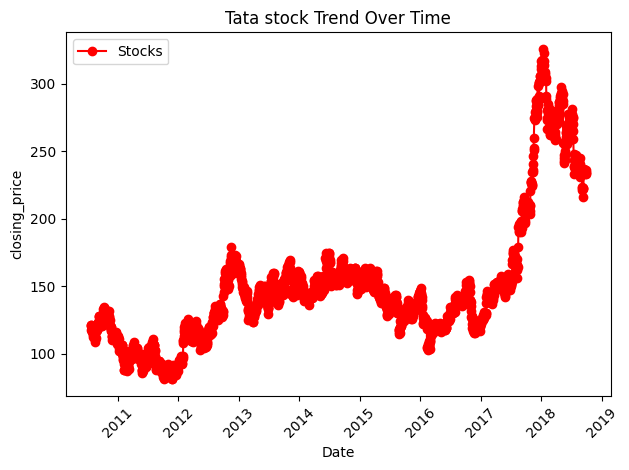

In [57]:
# Create a line chart
plt.plot(time['Date'], data['Close'], marker='o', linestyle='-', color='r', label='Stocks')


plt.xticks(rotation=45)
plt.xlabel('Date')
plt.ylabel('closing_price')
plt.title('Tata stock Trend Over Time')

plt.legend()

plt.tight_layout()
plt.show()

In [58]:
import numpy as np

In [61]:
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range=(0,1))
df1=scalar.fit_transform(np.array(close_data).reshape(-1,1))

In [65]:
df1.shape

(2035, 1)

In [67]:
print(df1)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [68]:
#Splitting data into train test split

In [87]:
training_size = int(len(df1)*0.65)
test_size = len(df1)-training_size
train_data, test_data = df1[:training_size,:],df1[training_size:len(df1),:1]

In [113]:
def create_dataset(dataset,time_step):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)    

In [129]:
X_train,y_train=create_dataset(train_data,100)

In [130]:
X_test,y_test=create_dataset(test_data,100)

In [132]:
print(X_test.shape),print(y_test.shape)

(612, 100)
(612,)


(None, None)

In [133]:
print(X_train.shape),print(y_train.shape)

(1221, 100)
(1221,)


(None, None)

In [138]:
#reshape input to be [samples , time_step, features] which is required for LSTM
X_train =  X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test  =  X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [141]:
#create stacked LSTM model

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [144]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [146]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [147]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
20/20 [==============================] - 11s 325ms/step - loss: 0.0304 - val_loss: 0.0040
Epoch 2/100
20/20 [==============================] - 6s 292ms/step - loss: 0.0042 - val_loss: 0.0012
Epoch 3/100
20/20 [==============================] - 6s 296ms/step - loss: 0.0016 - val_loss: 8.2223e-04
Epoch 4/100
20/20 [==============================] - 6s 285ms/step - loss: 0.0015 - val_loss: 9.7683e-04
Epoch 5/100
20/20 [==============================] - 6s 294ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 6/100
20/20 [==============================] - 6s 287ms/step - loss: 0.0016 - val_loss: 0.0010
Epoch 7/100
20/20 [==============================] - 6s 308ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 8/100
20/20 [==============================] - 6s 290ms/step - loss: 0.0013 - val_loss: 8.2667e-04
Epoch 9/100
20/20 [==============================] - 6s 294ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 10/100
20/20 [==============================] - 6s 287ms/step - loss: 0.

In [148]:
train_predict = model.predict(X_train)

39/39 [==============================] - 2s 30ms/step


In [150]:
test_predict = model.predict(X_test)

20/20 [==============================] - 1s 32ms/step
